# Intraday Factor

In this notebook we use Alphalens to analyse the performance of an intraday factor, which is computed daily but the stocks are bought at marker open and sold at market close with no overnight positions.

# Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import alphalens
import pandas as pd

In [3]:
%matplotlib inline

# Loading Data

Below is a simple mapping of tickers to sectors for a small universe of large cap stocks.

In [4]:
sector_names = {
    0 : "information_technology",
    1 : "financials",
    2 : "health_care",
    3 : "industrials",
    4 : "utilities", 
    5 : "real_estate", 
    6 : "materials", 
    7 : "telecommunication_services", 
    8 : "consumer_staples", 
    9 : "consumer_discretionary", 
    10 : "energy" 
}

ticker_sector = {
    "ACN" : 0, "ATVI" : 0, "ADBE" : 0, "AMD" : 0, "AKAM" : 0, "ADS" : 0, "GOOGL" : 0, "GOOG" : 0, 
    "APH" : 0, "ADI" : 0, "ANSS" : 0, "AAPL" : 0, "AMAT" : 0, "ADSK" : 0, "ADP" : 0, "AVGO" : 0,
    "AMG" : 1, "AFL" : 1, "ALL" : 1, "AXP" : 1, "AIG" : 1, "AMP" : 1, "AON" : 1, "AJG" : 1, "AIZ" : 1, "BAC" : 1,
    "BK" : 1, "BBT" : 1, "BRK.B" : 1, "BLK" : 1, "HRB" : 1, "BHF" : 1, "COF" : 1, "CBOE" : 1, "SCHW" : 1, "CB" : 1,
    "ABT" : 2, "ABBV" : 2, "AET" : 2, "A" : 2, "ALXN" : 2, "ALGN" : 2, "AGN" : 2, "ABC" : 2, "AMGN" : 2, "ANTM" : 2,
    "BCR" : 2, "BAX" : 2, "BDX" : 2, "BIIB" : 2, "BSX" : 2, "BMY" : 2, "CAH" : 2, "CELG" : 2, "CNC" : 2, "CERN" : 2,
    "MMM" : 3, "AYI" : 3, "ALK" : 3, "ALLE" : 3, "AAL" : 3, "AME" : 3, "AOS" : 3, "ARNC" : 3, "BA" : 3, "CHRW" : 3,
    "CAT" : 3, "CTAS" : 3, "CSX" : 3, "CMI" : 3, "DE" : 3, "DAL" : 3, "DOV" : 3, "ETN" : 3, "EMR" : 3, "EFX" : 3,
    "AES" : 4, "LNT" : 4, "AEE" : 4, "AEP" : 4, "AWK" : 4, "CNP" : 4, "CMS" : 4, "ED" : 4, "D" : 4, "DTE" : 4,
    "DUK" : 4, "EIX" : 4, "ETR" : 4, "ES" : 4, "EXC" : 4, "FE" : 4, "NEE" : 4, "NI" : 4, "NRG" : 4, "PCG" : 4,
    "ARE" : 5, "AMT" : 5, "AIV" : 5, "AVB" : 5, "BXP" : 5, "CBG" : 5, "CCI" : 5, "DLR" : 5, "DRE" : 5,
    "EQIX" : 5, "EQR" : 5, "ESS" : 5, "EXR" : 5, "FRT" : 5, "GGP" : 5, "HCP" : 5, "HST" : 5, "IRM" : 5, "KIM" : 5,
    "APD" : 6, "ALB" : 6, "AVY" : 6, "BLL" : 6, "CF" : 6, "DWDP" : 6, "EMN" : 6, "ECL" : 6, "FMC" : 6, "FCX" : 6,
    "IP" : 6, "IFF" : 6, "LYB" : 6, "MLM" : 6, "MON" : 6, "MOS" : 6, "NEM" : 6, "NUE" : 6, "PKG" : 6, "PPG" : 6,
    "T" : 7, "CTL" : 7, "VZ" : 7, 
    "MO" : 8, "ADM" : 8, "BF.B" : 8, "CPB" : 8, "CHD" : 8, "CLX" : 8, "KO" : 8, "CL" : 8, "CAG" : 8,
    "STZ" : 8, "COST" : 8, "COTY" : 8, "CVS" : 8, "DPS" : 8, "EL" : 8, "GIS" : 8, "HSY" : 8, "HRL" : 8,
    "AAP" : 9, "AMZN" : 9, "APTV" : 9, "AZO" : 9, "BBY" : 9, "BWA" : 9, "KMX" : 9, "CCL" : 9, 
    "APC" : 10, "ANDV" : 10, "APA" : 10, "BHGE" : 10, "COG" : 10, "CHK" : 10, "CVX" : 10, "XEC" : 10, "CXO" : 10,
    "COP" : 10, "DVN" : 10, "EOG" : 10, "EQT" : 10, "XOM" : 10, "HAL" : 10, "HP" : 10, "HES" : 10, "KMI" : 10
}

## YFinance Download

In [5]:
try: 
    import yfinance as yf
except ImportError:
    print('Install yfinance using `pip install yfinance` first')

In [6]:
try: 
    import pandas_datareader.data as web
except ImportError:
    print('Install pandas-datareader using `pip install pandas_datareader` first')

In [7]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

tickers = list(ticker_sector.keys())
df = web.get_data_yahoo(tickers, start='2017-01-01',  end='2017-06-01')
df.index = pd.to_datetime(df.index, utc=True)

[*********************100%%**********************]  182 of 182 completed

29 Failed downloads:
['BRK.B', 'ATVI', 'DWDP', 'DRE', 'APC', 'ABC', 'BHGE', 'CXO', 'ALXN', 'COG', 'ARNC', 'ANTM', 'XEC', 'BBT', 'CELG', 'ADS', 'BLL', 'MON', 'AGN', 'CERN', 'CTL']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BHF', 'CHK', 'HCP']: Exception("%ticker%: Data doesn't exist for startDate = 1483246800, endDate = 1496289600")
['BCR', 'GGP', 'CBG', 'DPS', 'BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-01 -> 2017-06-01)')


In [8]:
df = df.stack()
df.index.names = ['date', 'asset']
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15759 entries, (Timestamp('2017-01-03 00:00:00+0000', tz='UTC'), 'A') to (Timestamp('2017-05-31 00:00:00+0000', tz='UTC'), 'XOM')
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  15759 non-null  float64
 1   Close      15759 non-null  float64
 2   High       15759 non-null  float64
 3   Low        15759 non-null  float64
 4   Open       15759 non-null  float64
 5   Volume     15759 non-null  float64
dtypes: float64(6)
memory usage: 795.3+ KB


# Factor Computation

Our example factor ranks the stocks based on their overnight price gap (yesterday close to today open price). We'll  see if the factor has some alpha or if it is pure noise.

In [9]:
available_tickers = df.index.unique('asset')
ticker_sector = {k: v for k, v in ticker_sector.items() if k in available_tickers}

In [10]:
today_open = df.loc[:, 'Open'].unstack('asset')
today_close = df.loc[:, 'Close'].unstack('asset')
yesterday_close = today_close.shift(1)

In [11]:
factor = (today_open - yesterday_close) / yesterday_close

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after a factor value was observed at a given timestamp. Those prices must not be used in the calculation of the factor values for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestamps will be used and so on.

There are no restrinctions/assumptions on the time frequencies a factor should be computed at and neither on the specific time a factor should be traded (trading at the open vs trading at the close vs intraday trading), it is only required that factor and price DataFrames are properly aligned given the rules above.

In our example, we want to buy the stocks at marker open, so the need the open price at the exact timestamps as the factor valules, and we want to sell the stocks at market close so we will add the close prices too, which will be used to compute period 1 forward returns as they appear just after the factor values timestamps. The returns computed by Alphalens will therefore be based on the difference between open to close assets prices.

If we had other prices we could compute other period returns, for example one hour after market open and 2 hours and so on. We could have added those prices right after the open prices and instruct Alphalens to compute 1, 2, 3... periods too  and not only period 1 like in this example.

## Data Formatting

### Time Adjustments

In [12]:
# Fix time as Yahoo doesn't set it
today_open.index += pd.Timedelta('9h30m')
today_close.index += pd.Timedelta('16h')
# pricing will contain both open and close
pricing = pd.concat([today_open, today_close]).sort_index()

In [13]:
pricing.head()

asset,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,NRG,NUE,PCG,PKG,PPG,SCHW,STZ,T,VZ,XOM
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03 09:30:00+00:00,45.930000,47.279999,170.779999,28.950001,62.919998,38.630001,117.379997,103.430000,72.599998,45.689999,...,12.32,59.740002,60.810001,85.160004,95.430000,40.049999,155.009995,32.243202,53.959999,90.940002
2017-01-03 16:00:00+00:00,46.490002,46.299999,170.600006,29.037500,62.410000,39.049999,116.459999,103.480003,72.510002,46.189999,...,12.30,59.610001,60.369999,85.000000,95.250000,40.200001,154.750000,32.492447,54.580002,90.889999
2017-01-04 09:30:00+00:00,46.930000,46.630001,170.369995,28.962500,62.639999,39.060001,116.910004,103.739998,72.769997,46.380001,...,12.32,59.759998,60.610001,85.440002,95.709999,40.400002,157.149994,32.432022,54.549999,91.120003
2017-01-04 16:00:00+00:00,47.099998,46.700001,172.000000,29.004999,63.290001,39.360001,116.739998,104.139999,72.360001,46.110001,...,13.03,61.250000,60.590000,86.370003,97.269997,41.220001,157.990005,32.303623,54.520000,89.889999
2017-01-05 09:30:00+00:00,47.049999,46.520000,170.869995,28.980000,63.380001,39.240002,116.980003,104.129997,72.410004,46.099998,...,13.01,61.119999,60.660000,86.370003,96.459999,40.970001,150.550003,32.364048,54.779999,90.190002


### Align Factor & Price

In [14]:
# Align factor to open price
factor.index += pd.Timedelta('9h30m')
factor = factor.stack()
factor.index = factor.index.set_names(['date', 'asset'])

In [15]:
factor.unstack().head()

asset,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,NRG,NUE,PCG,PKG,PPG,SCHW,STZ,T,VZ,XOM
date,,,,,,,,,,,,,,,,,,,,,
2017-01-04 09:30:00+00:00,0.009464,0.007127,-0.001348,-0.002583,0.003685,0.000256,0.003864,0.002513,0.003586,0.004113,...,0.001626,0.002516,0.003976,0.005176,0.004829,0.004975,0.015509,-0.001860,-0.000550,0.002531
2017-01-05 09:30:00+00:00,-0.001062,-0.003854,-0.006570,-0.000862,0.001422,-0.003049,0.002056,-0.000096,0.000691,-0.000217,...,-0.001535,-0.002122,0.001155,0.000000,-0.008327,-0.006065,-0.047092,0.001871,0.004769,0.003337
2017-01-06 09:30:00+00:00,0.001934,-0.000872,-0.003258,0.001458,0.001725,0.000000,0.000000,0.000661,0.003646,-0.016386,...,0.002259,-0.000328,-0.003304,0.000469,0.001569,0.008055,0.001635,-0.015709,-0.017753,0.002710
2017-01-09 09:30:00+00:00,0.000417,-0.004328,0.002535,0.000339,0.000157,0.000245,-0.001376,-0.003139,0.000559,-0.004696,...,-0.000748,0.009786,-0.000327,-0.003440,-0.005649,-0.005578,0.003747,-0.000726,-0.000751,-0.003164
2017-01-10 09:30:00+00:00,0.004155,-0.001699,-0.004896,-0.001849,-0.002492,0.001718,-0.000522,0.000000,-0.000973,0.001117,...,-0.002970,0.012743,0.000498,-0.000798,-0.002906,0.001702,-0.001797,-0.003431,0.000190,0.001494


# Run Alphalens

Period 1 will show returns from market open to market close while period 2 will show returns from today open to tomorrow open

## Get Alphalens Input

In [16]:
non_predictive_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, 
                                                                                  pricing, 
                                                                                  periods=(1,2),
                                                                                  groupby=ticker_sector,
                                                                                  groupby_labels=sector_names)

Dropped 2.9% entries from factor data: 1.0% in forward returns computation and 2.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


## Returns Tear Sheet

Returns Analysis


,6h30m,1D
Ann. alpha,0.287,-0.043
beta,0.159,0.155
Mean Period Wise Return Top Quantile (bps),-7.544,-2.207
Mean Period Wise Return Bottom Quantile (bps),0.288,0.944
Mean Period Wise Spread (bps),-7.832,-3.153


<Figure size 640x480 with 0 Axes>

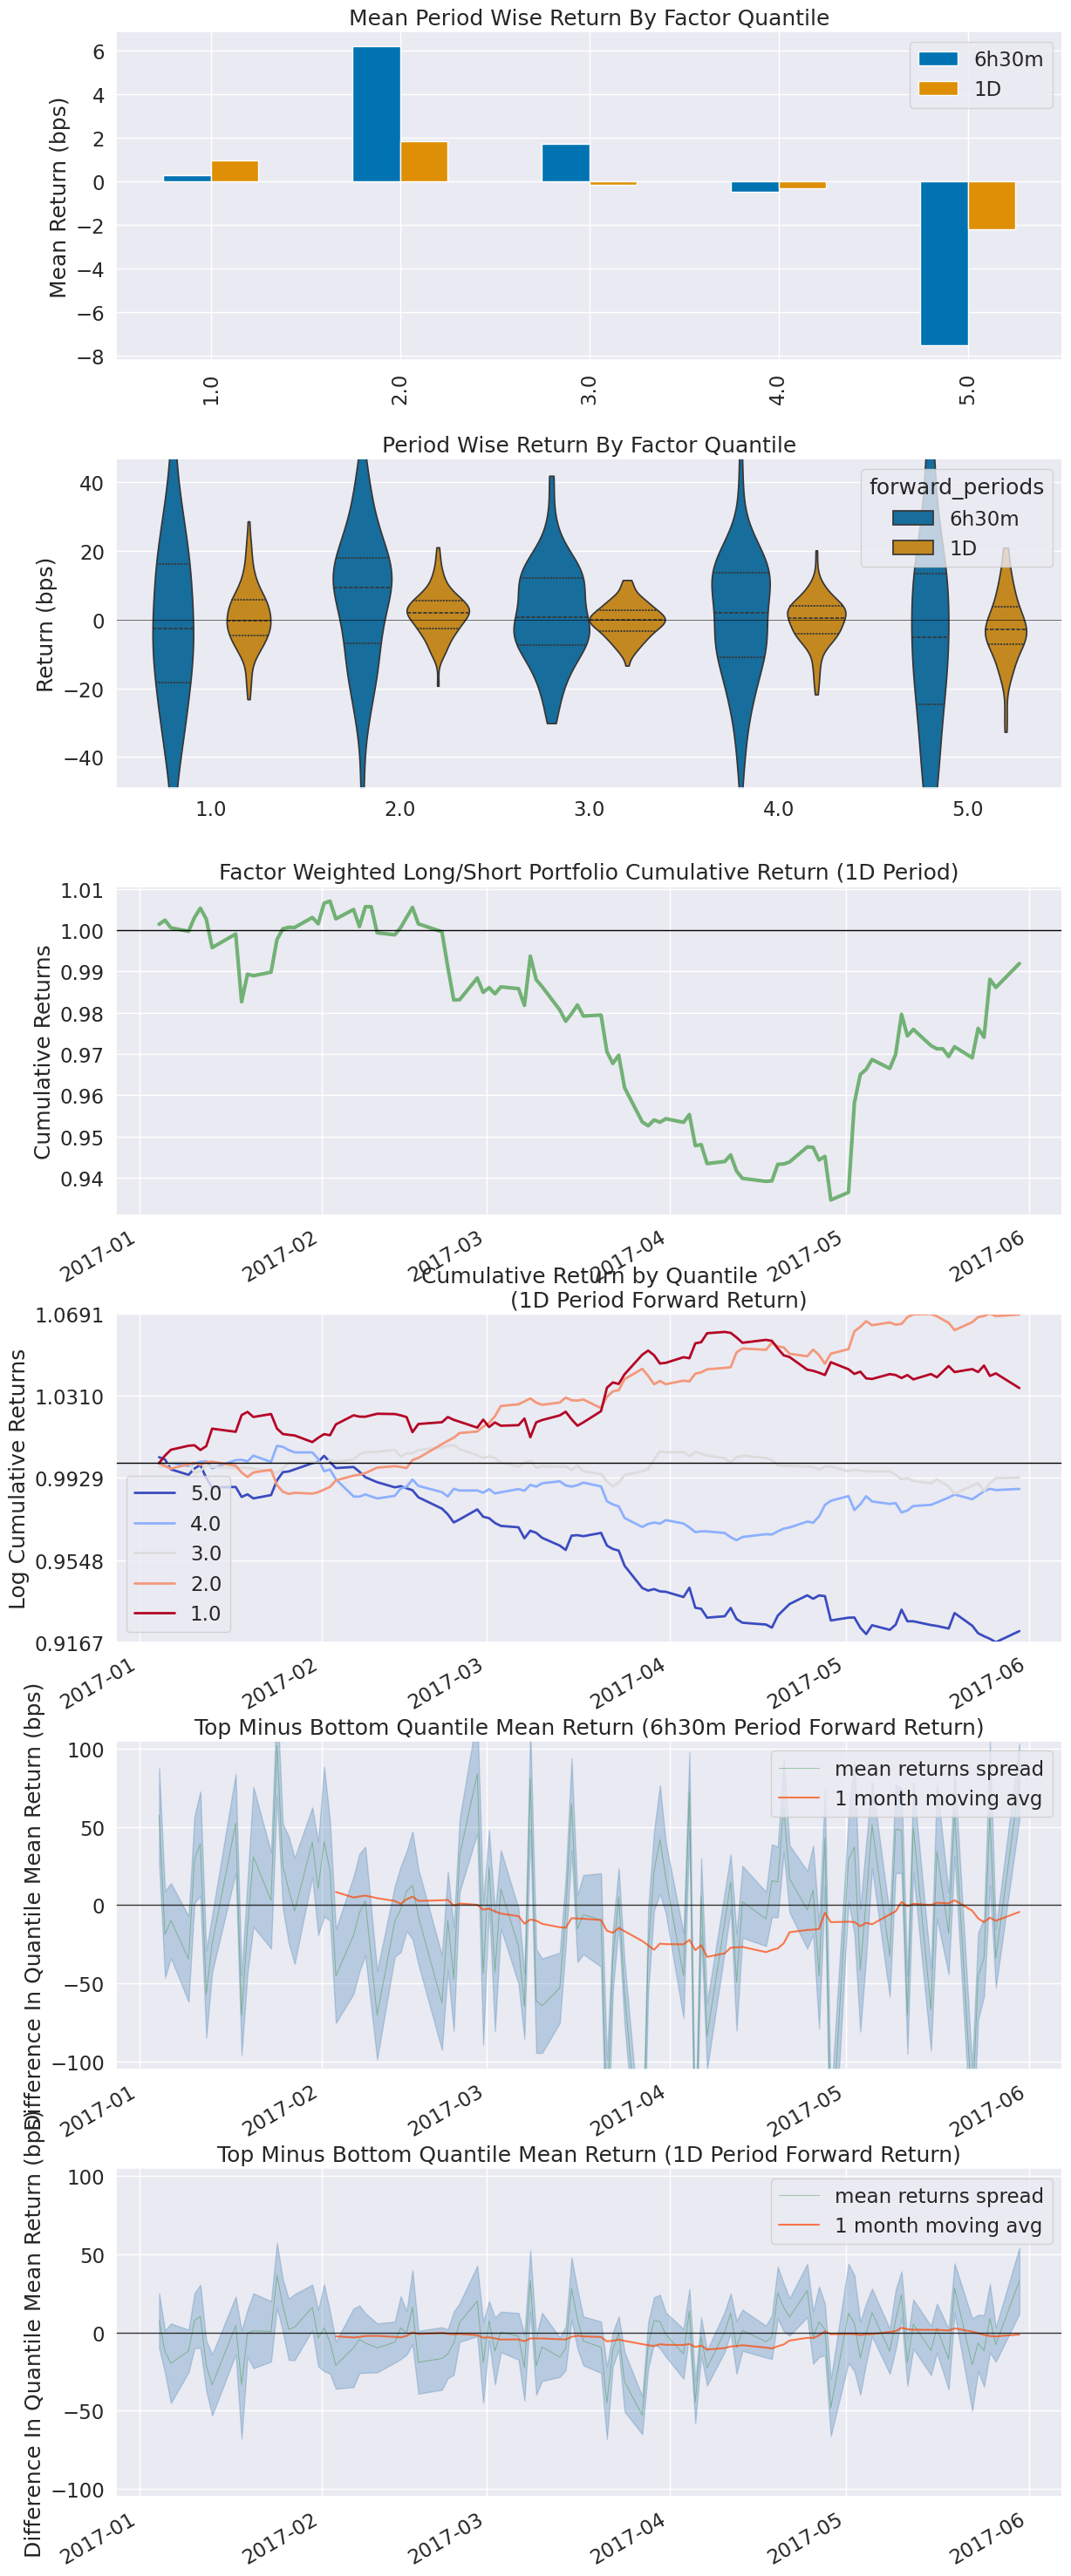

In [17]:
alphalens.tears.create_returns_tear_sheet(non_predictive_factor_data)

<Figure size 640x480 with 0 Axes>

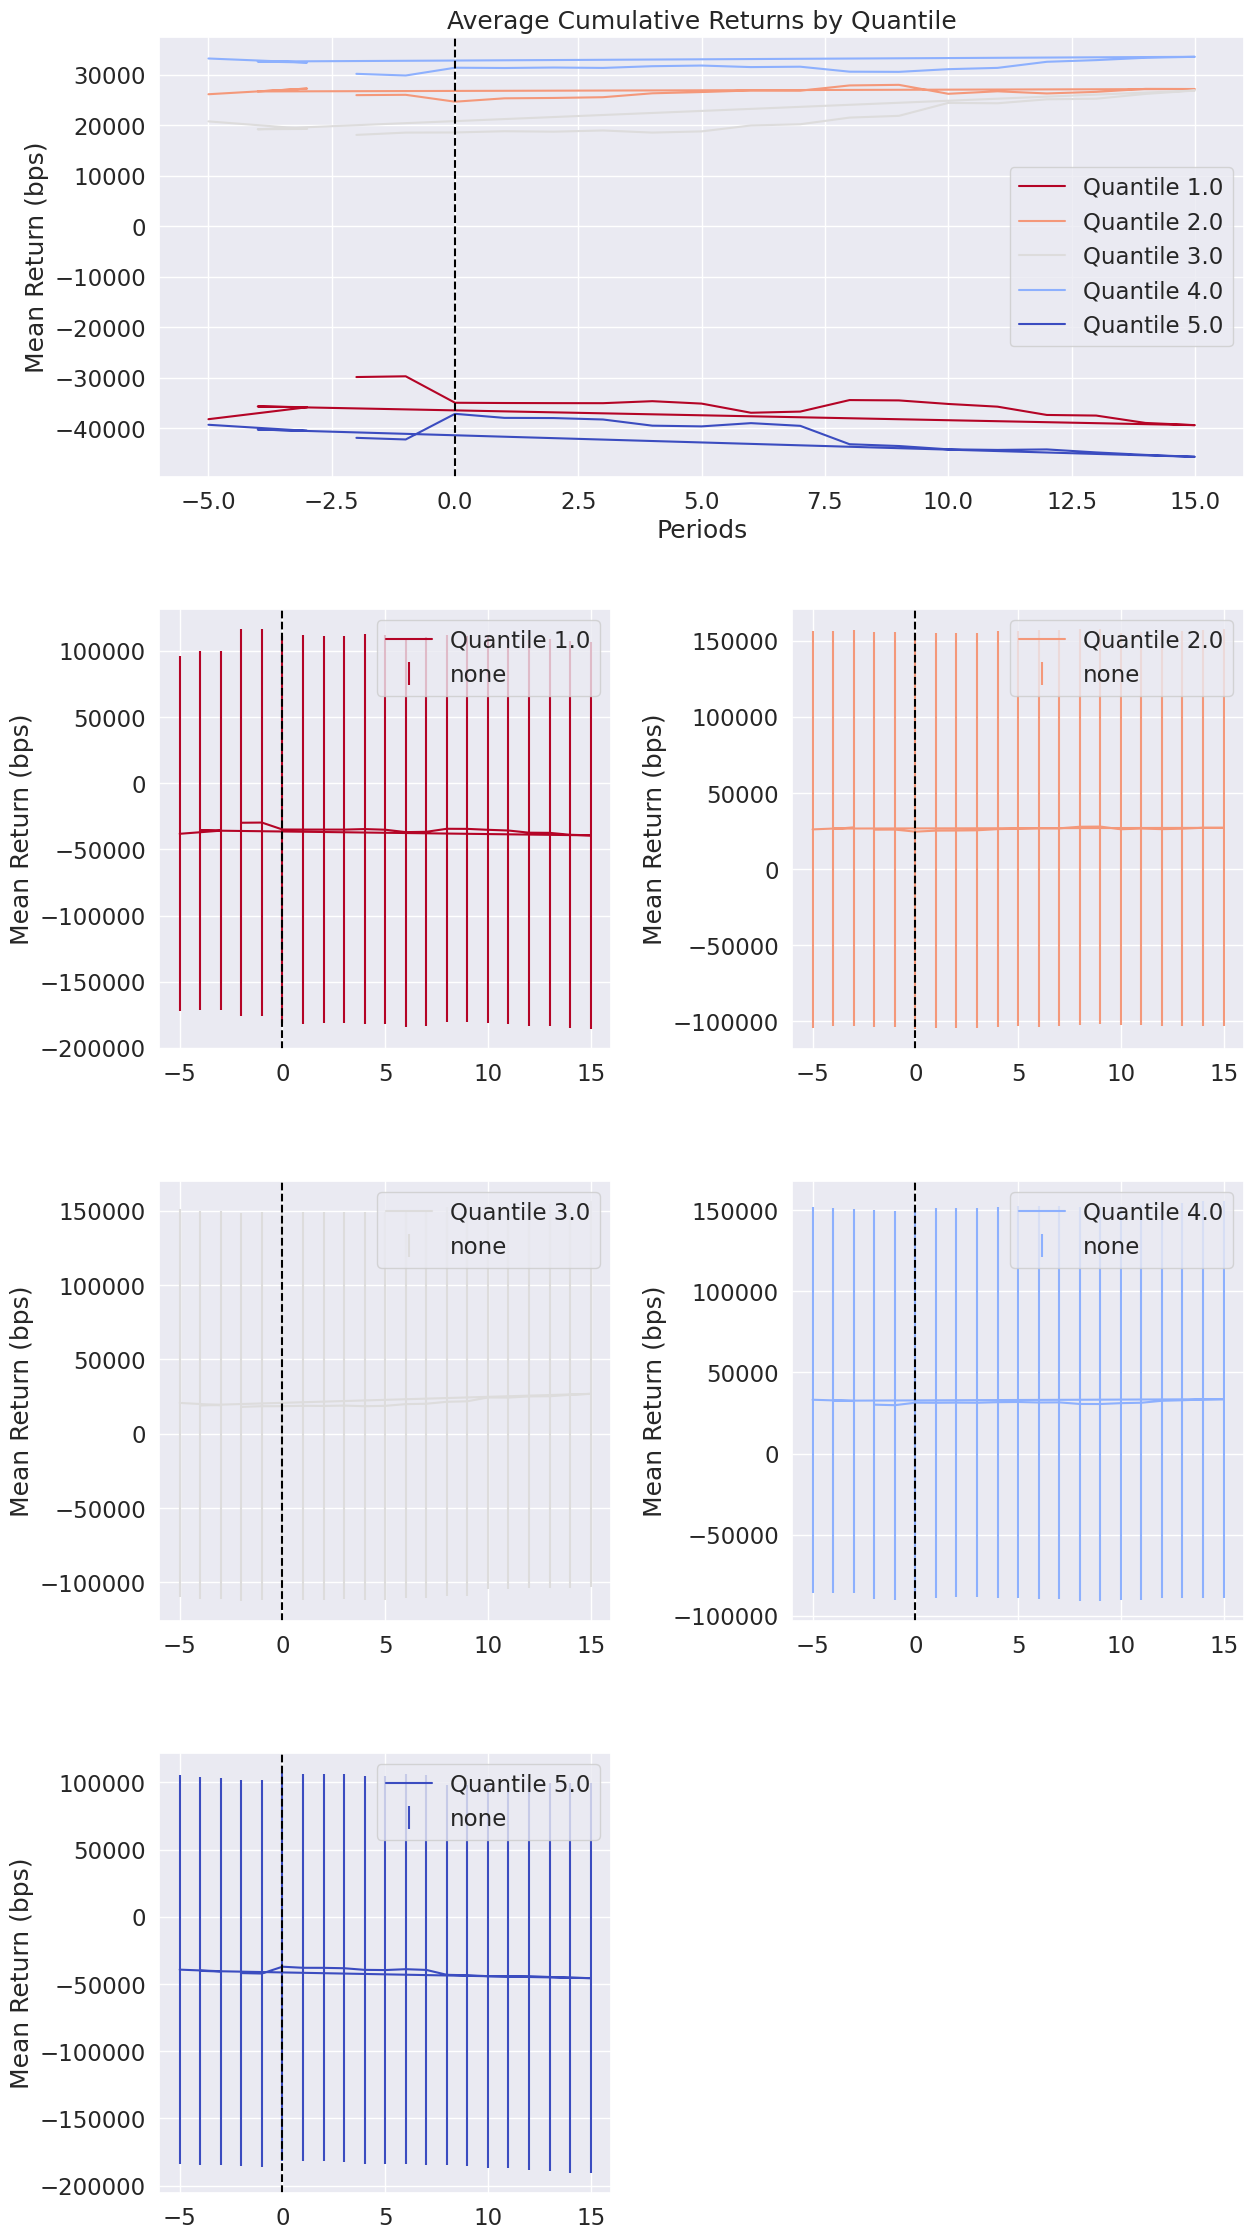

In [18]:
alphalens.tears.create_event_returns_tear_sheet(non_predictive_factor_data, pricing);